### imports

In [145]:
import math
import pandas as pd
import matplotlib.pyplot as plt

### PARAMETERS

In [174]:
## Set parameters
# Speed translates from F?? to mm/s (ie. F90 = 1.5mm/s)

line_spacing    = 1.6
line_num        = 6 # if select 7 lines actually 8 lines
layer_height    = 0.84
layer_num       = 4
starting_pointx = 10
starting_pointy = 30
scaffold_size   = line_num * line_spacing
mixingA         = 0.6
mixingB         = 0.4
elow            = 0.14
ehigh           = 1.03
startcode       = "T0 \nM140 S38 \nM190 S38 \nM82 ;absolute extrusion mode \nG1 Z15.0 F6000 ;Move the platform down 15mm \n;Prime the extruder \nG92 E0 \nM83 ;relative extrusion mode"
speed           = 180
#endcode         = "Pulling strand of last layer \nG0 F3600 X", xvalues[-1], "Y", yvalues[-1], "\n;Pulling upwards \nG0 F3600 X55.335 Y95 Z ", layer_height * layer_num, "\nG0 Z-",(layer_height * layer_num)*1.5 ,"\n;ENDCODE \nM84 \nM82 ;absolute extrusion mode \nM104 S0 \nEnd of Gcode"

# preextrusion
preExtrusion    = 1
premixingA      = 0.5
premixingB      = 0.5

#multiple scaffolds
n_rows          = 10
n_columns        = 10
distance_scaf   = 20


### ROW_LIST and COLUMN_LIST

In [175]:
def col_row_lst(n_columns, n_rows, distance_scaf):
    
    
    global col_lst
    col_lst = []

    for index in range(0,n_columns):
        col_lst.append(index*distance_scaf)

    global row_lst
    row_lst = []
    for index in range(0,n_rows):
        row_lst.append(index*(-distance_scaf))
        
    return row_lst, col_lst

In [176]:
col_row_lst(n_columns = n_columns, n_rows = n_rows, distance_scaf = distance_scaf)

([0, -20, -40, -60, -80, -100, -120, -140, -160, -180],
 [0, 20, 40, 60, 80, 100, 120, 140, 160, 180])

### LAYER 1

In [177]:
def layer1coord(starting_pointx, starting_pointy, scaffold_size, ehigh, elow, line_num):
    
    # xcoordinates
    xcoordinates = []
    xcoordinate = starting_pointx
    for i in list(range(0,line_num)):
        xcoordinate += line_spacing
        xcoordinates.append(xcoordinate)
        
    # xValues for layer 1 
    global xvalues
    xvalues = []
    n=0
    xvalues.append(starting_pointx)
    for i in list(range(0,line_num)):
        xvalues.append(xcoordinates[n])
        xvalues.append(xcoordinates[n])
        n = n+1
        
    # eValues for layer 1 & 2
    evalues = [ehigh,elow]
    evalues = evalues * (line_num+1)
    evalues = evalues[:-1]
    
    # yValues for layer 1
    global yvalues
    yvalues = []
    ycoordinates = [starting_pointy + scaffold_size, starting_pointy + scaffold_size, starting_pointy, starting_pointy]
    ycoordinates = ycoordinates * line_num
    n=0
    for i in range(0, len(xvalues)):
        yvalues.append(ycoordinates[n])
        n = n+1
    
    # dataframe    
    global layer1
    layer1 = pd.DataFrame()
    layer1["Xcoordinate"] = xvalues
    layer1["Ycoordinate"] = yvalues
    layer1["Evalues"] =  evalues
    layer1
    
    return xcoordinates, evalues, yvalues, xvalues, layer1

In [178]:
layer1coord(starting_pointx= starting_pointx, starting_pointy= starting_pointy, scaffold_size=scaffold_size, line_num=line_num, elow=elow, ehigh=ehigh)

([11.6, 13.2, 14.799999999999999, 16.4, 18.0, 19.6],
 [1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03],
 [39.6, 39.6, 30, 30, 39.6, 39.6, 30, 30, 39.6, 39.6, 30, 30, 39.6],
 [10,
  11.6,
  11.6,
  13.2,
  13.2,
  14.799999999999999,
  14.799999999999999,
  16.4,
  16.4,
  18.0,
  18.0,
  19.6,
  19.6],
     Xcoordinate  Ycoordinate  Evalues
 0          10.0         39.6     1.03
 1          11.6         39.6     0.14
 2          11.6         30.0     1.03
 3          13.2         30.0     0.14
 4          13.2         39.6     1.03
 5          14.8         39.6     0.14
 6          14.8         30.0     1.03
 7          16.4         30.0     0.14
 8          16.4         39.6     1.03
 9          18.0         39.6     0.14
 10         18.0         30.0     1.03
 11         19.6         30.0     0.14
 12         19.6         39.6     1.03)

### LAYER 2 ODD

In [179]:
def layer2oddcoord(starting_pointx, starting_pointy, scaffold_size, ehigh, elow, line_num):
    
    ycoordinatesodd = []
    ycoordinateodd = starting_pointy
    for i in list(range(0,line_num)):
        ycoordinateodd += line_spacing
        ycoordinatesodd.append(ycoordinateodd)
        
    global yvalues2odd   
    yvalues2odd = []
    n=0
    yvalues2odd.append(starting_pointy)
    for i in list(range(0,line_num)):
        yvalues2odd.append(ycoordinatesodd[n])
        yvalues2odd.append(ycoordinatesodd[n])
        n = n+1
        
    # eValues for layer 1 & 2
    evalues = [ehigh,elow]
    evalues = evalues * (line_num+1)
    evalues = evalues[:-1]
    
    

    # xValues for layer 2
    global xvalues2odd
    xvalues2odd = []
    xcoordinates2odd = [starting_pointx, starting_pointx, starting_pointx + scaffold_size, starting_pointx + scaffold_size]
    xcoordinates2odd = xcoordinates2odd * line_num
    n=0
    for i in range(0, len(yvalues2odd)):
        xvalues2odd.append(xcoordinates2odd[n])
        n = n+1

    global layer2odd
    layer2odd = pd.DataFrame()
    layer2odd["Xcoordinate2odd"] = xvalues2odd
    layer2odd["Ycoordinate2odd"] = yvalues2odd
    layer2odd["Evalues"] =  evalues  
    
    return xcoordinates2odd, evalues, yvalues2odd, xvalues2odd, layer2odd

In [180]:
layer2oddcoord(starting_pointx= starting_pointx, starting_pointy= starting_pointy, scaffold_size=scaffold_size, line_num=line_num, elow=elow, ehigh=ehigh)

([10,
  10,
  19.6,
  19.6,
  10,
  10,
  19.6,
  19.6,
  10,
  10,
  19.6,
  19.6,
  10,
  10,
  19.6,
  19.6,
  10,
  10,
  19.6,
  19.6,
  10,
  10,
  19.6,
  19.6],
 [1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03],
 [30,
  31.6,
  31.6,
  33.2,
  33.2,
  34.800000000000004,
  34.800000000000004,
  36.400000000000006,
  36.400000000000006,
  38.00000000000001,
  38.00000000000001,
  39.60000000000001,
  39.60000000000001],
 [10, 10, 19.6, 19.6, 10, 10, 19.6, 19.6, 10, 10, 19.6, 19.6, 10],
     Xcoordinate2odd  Ycoordinate2odd  Evalues
 0              10.0             30.0     1.03
 1              10.0             31.6     0.14
 2              19.6             31.6     1.03
 3              19.6             33.2     0.14
 4              10.0             33.2     1.03
 5              10.0             34.8     0.14
 6              19.6             34.8     1.03
 7              19.6             36.4     0.14
 8              10.0     

### LAYER2 EVEN

In [181]:
def layer2evencoord(starting_pointx, starting_pointy, scaffold_size, ehigh, elow, line_num):
    
    ycoordinateseven = []
    ycoordinateeven = layer1.loc[0,"Ycoordinate"]
    for i in list(range(0,line_num)):
        ycoordinateeven -= line_spacing
        ycoordinateseven.append(ycoordinateeven)
        
    global yvalues2even  
    yvalues2even = []
    n=0
    yvalues2even.append(layer1.loc[0,"Ycoordinate"])
    for i in list(range(0,line_num)):
        yvalues2even.append(ycoordinateseven[n])
        yvalues2even.append(ycoordinateseven[n])
        n = n+1
        
    # eValues for layer 1 & 2
    evalues = [ehigh,elow]
    evalues = evalues * (line_num+1)
    evalues = evalues[:-1]
    
    

    # xValues for layer 2
    global xvalues2even
    xvalues2even = []
    xcoordinates2even = [starting_pointx, starting_pointx, starting_pointx + scaffold_size, starting_pointx + scaffold_size]
    xcoordinates2even = xcoordinates2even * line_num
    n=0
    for i in range(0, len(yvalues2even)):
        xvalues2even.append(xcoordinates2even[n])
        n = n+1

    global layer2even
    layer2even = pd.DataFrame()
    layer2even["Xcoordinate2even"] = xvalues2even
    layer2even["Ycoordinate2even"] = yvalues2even
    layer2even["Evalues"] =  evalues  
    
    return xcoordinates2even, evalues, yvalues2even, xvalues2even, layer2even

In [182]:
layer2evencoord(starting_pointx= starting_pointx, starting_pointy= starting_pointy, scaffold_size=scaffold_size, line_num=line_num, elow=elow, ehigh=ehigh)

([10,
  10,
  19.6,
  19.6,
  10,
  10,
  19.6,
  19.6,
  10,
  10,
  19.6,
  19.6,
  10,
  10,
  19.6,
  19.6,
  10,
  10,
  19.6,
  19.6,
  10,
  10,
  19.6,
  19.6],
 [1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03,
  0.14,
  1.03],
 [39.6,
  38.0,
  38.0,
  36.4,
  36.4,
  34.8,
  34.8,
  33.199999999999996,
  33.199999999999996,
  31.599999999999994,
  31.599999999999994,
  29.999999999999993,
  29.999999999999993],
 [10, 10, 19.6, 19.6, 10, 10, 19.6, 19.6, 10, 10, 19.6, 19.6, 10],
     Xcoordinate2even  Ycoordinate2even  Evalues
 0               10.0              39.6     1.03
 1               10.0              38.0     0.14
 2               19.6              38.0     1.03
 3               19.6              36.4     0.14
 4               10.0              36.4     1.03
 5               10.0              34.8     0.14
 6               19.6              34.8     1.03
 7               19.6              33.2     0.14
 8               10.0        

### PREEXTRUDE

In [183]:
def preextrude(starting_pointx, line_spacing, yvalues, elow, ehigh):
    
    # xValues for preextrude
    global xprecoordinates
    xprecoordinates = []
    xprecoordinate = starting_pointx
    for i in list(range(0,3)):
        xprecoordinate -= line_spacing
        xprecoordinates.append(xprecoordinate)
    
    global xprevalues
    xprevalues = []
    n=0
    xprevalues.append(starting_pointx)
    for i in list(range(0,3)):
        xprevalues.append(xprecoordinates[n])
        xprevalues.append(xprecoordinates[n])
        n = n+1
        
    # eValues for preextrude
    evalues = [ehigh,elow]
    evalues = evalues * (line_num+1)
    evalues = evalues[:-1]
    
    #preextrusion dataframe
    xprevalues.reverse()
    global dfpreextrude 
    dfpreextrude = pd.DataFrame()
    dfpreextrude["Xprecoordinate"] = xprevalues
    dfpreextrude["Yprecoordinate"] = yvalues[1:len(xprevalues)+1]
    dfpreextrude["preEvalues"] =  evalues[0:len(xprevalues)]

    return xprecoordinates, xprevalues, dfpreextrude

In [184]:
preextrude(starting_pointx= starting_pointx, line_spacing = line_spacing, elow=elow, ehigh=ehigh, yvalues=yvalues)

([8.4, 6.800000000000001, 5.200000000000001],
 [5.200000000000001,
  5.200000000000001,
  6.800000000000001,
  6.800000000000001,
  8.4,
  8.4,
  10],
    Xprecoordinate  Yprecoordinate  preEvalues
 0             5.2            39.6        1.03
 1             5.2            30.0        0.14
 2             6.8            30.0        1.03
 3             6.8            39.6        0.14
 4             8.4            39.6        1.03
 5             8.4            30.0        0.14
 6            10.0            30.0        1.03)

In [185]:
yvalues[1:len(xprevalues)+1]

[39.6, 30, 30, 39.6, 39.6, 30, 30]

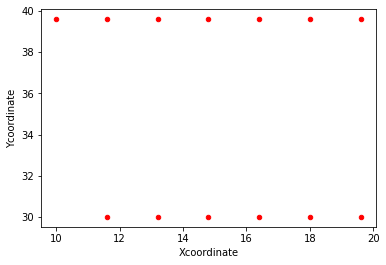

In [186]:
layer1.plot(kind='scatter',x='Xcoordinate',y='Ycoordinate',color='red')
plt.show()

In [187]:
def origi_scaffold(layer_height, speed, xvalues, yvalues, layer_num, layer1, xvalues2, yvalues2, layer2even):
    
    curr_height = layer_height
    
    # START CODE 
    
    with open("Gcode.txt", "a") as f:
        print(";STARTCODE","\n", file=f)
        print(startcode,"\n", file=f)
        print("M165", "A" + str(premixingA),"B" + str(premixingB), "\n", file=f)

    with open("Gcode.txt", "a") as f:
        print("G0 F600", "X" +  str(xprevalues[0]), "Y" + str(yvalues[0]), "Z" + str(curr_height), file=f)
        print("G0 F", speed/2, "X" + str(xprevalues[0]), "Y" + str(yvalues[0]), "Z" + str(curr_height),"\n", file=f)
        curr_height = curr_height + layer_height
 

    # PREEXTRUDE
    with open("Gcode.txt", "a") as f:
        for index in range(len(dfpreextrude)):
            with open("Gcode.txt", "a") as f:
                print("G1",
                "X" + str(dfpreextrude.loc[index,"Xprecoordinate"]), 
                 "Y" + str(dfpreextrude.loc[index , "Yprecoordinate"]),
                 "E" + str(dfpreextrude.loc[index , "preEvalues"]), file=f)
                
    # MIXING                
    with open("Gcode.txt", "a") as f:
        print("\n", file=f)
        print("M165", "A" + str(mixingA),"B" + str(mixingB), "\n", file=f)

        
    # OIRIGIGI SCAFFOLD

    n=1
    
    with open("Gcode.txt", "a") as f:
        print("G0 F" + str(speed), file=f)
        
    
    with open("Gcode.txt", "a") as f:
        for i in range(1,layer_num+1):
            if i % 2 != 0:
                # LAYER 1  
                with open("Gcode.txt", "a") as f:
                    print(";Layer number", n, file=f)
                    n+=1
                    
                with open("Gcode.txt", "a") as f:
                    for index in range(len(layer1)):
                        with open("Gcode.txt", "a") as f:
                            print("G1",
                                "X" + str(layer1.loc[index, "Xcoordinate"]), 
                                "Y" + str(layer1.loc[index, "Ycoordinate"]),
                                "E" + str(layer1.loc[index, "Evalues"]), file=f)

                    with open("Gcode.txt", "a") as f:
                        print("G0", "X" + str(xvalues[-1]), "Y" + str(yvalues[-1]), "Z" + str(curr_height), file=f)
                        print("\n", file=f)
                        
                    curr_height = curr_height + layer_height

            else:
                    # LAYER 2  
                with open("Gcode.txt", "a") as f:
                    print(";Layer number", n, file=f)
                    n+=1
                
                with open("Gcode.txt", "a") as f:
                    for index in range(len(layer2even)):
                        with open("Gcode.txt", "a") as f:
                            print("G1",
                                "X" + str(layer2even.loc[index, "Xcoordinate2even"]), 
                                "Y" + str(layer2even.loc[index, "Ycoordinate2even"]),
                                "E" + str(layer2even.loc[index,"Evalues"]), file=f)

                    with open("Gcode.txt", "a") as f:
                        print("G0", "X" + str(xvalues2even[-1]), "Y" + str(yvalues2even[-1]), "Z" + str(curr_height), file=f)
                        print("\n", file=f)


                    curr_height = curr_height + layer_height
            

In [160]:
origi_scaffold(layer_height=layer_height, speed=speed, xvalues =  xvalues, yvalues = yvalues, layer_num = layer_num, layer1 = layer1, xvalues2 = xvalues2even, yvalues2 = yvalues2even, layer2even = layer2even)

In [63]:
str(layer2even.loc[1, "Xcoordinate2even"]+rowlst[1])

'20.0'

In [134]:
layer_height

0.84

In [188]:
def multiply_scaffold(layer_height, speed, xvalues, yvalues, layer_num, layer1, xvalues2, yvalues2, layer2even):
    
    curr_height = layer_height
    
    # START CODE 
    
    with open("Gcode.txt", "a") as f:
        print(";STARTCODE","\n", file=f)
        print(startcode,"\n", file=f)
        print("M165", "A" + str(premixingA),"B" + str(premixingB), "\n", file=f)

    with open("Gcode.txt", "a") as f:
        print("G0 F600", "X" +  str(xprevalues[0]), "Y" + str(yvalues[0]), "Z" + str(curr_height), file=f)
        print("G0 F", speed/2, "X" + str(xprevalues[0]), "Y" + str(yvalues[0]), "Z" + str(curr_height),"\n", file=f)
        curr_height = curr_height + layer_height
 

    # PREEXTRUDE
    with open("Gcode.txt", "a") as f:
        for index in range(len(dfpreextrude)):
            with open("Gcode.txt", "a") as f:
                print("G1",
                "X" + str(dfpreextrude.loc[index,"Xprecoordinate"]), 
                 "Y" + str(dfpreextrude.loc[index , "Yprecoordinate"]),
                 "E" + str(dfpreextrude.loc[index , "preEvalues"]), file=f)
                
    # MIXING                
    with open("Gcode.txt", "a") as f:
        print("\n", file=f)
        print("M165", "A" + str(mixingA),"B" + str(mixingB), "\n", file=f)

        
    # MULTIPLE SCAFFOLD

    for l in range (0, len(col_lst)):
        
        for m in range(0, len(row_lst)):
            
        
            curr_height = layer_height

            n=1

            with open("Gcode.txt", "a") as f:
                print("G0 F"  + str(600), "X" + str(xvalues2even[-1] + col_lst[l]), "Y" + str(yvalues2even[-1] + row_lst[m]), file=f)
                print("\n", file=f)

            with open("Gcode.txt", "a") as f:
                print("G0 F" + str(speed), "Z" + str(curr_height), file=f)


            with open("Gcode.txt", "a") as f:
                for i in range(1,layer_num+1):
                    if i % 2 != 0:
                        # LAYER 1  
                        with open("Gcode.txt", "a") as f:
                            print(";Layer number", n, file=f)
                            n+=1

                        with open("Gcode.txt", "a") as f:
                            for index in range(len(layer1)):
                                with open("Gcode.txt", "a") as f:
                                    print("G1",
                                        "X" + str(layer1.loc[index, "Xcoordinate"] + col_lst[l]), 
                                        "Y" + str(layer1.loc[index, "Ycoordinate"] + row_lst[m]),
                                        "E" + str(layer1.loc[index, "Evalues"]), file=f)

                            curr_height = curr_height + layer_height

                            with open("Gcode.txt", "a") as f:
                                print("G0", "X" + str(xvalues[-1] + col_lst[l]), "Y" + str(yvalues[-1] + row_lst[m]), "Z" + str(curr_height), file=f)
                                print("\n", file=f)


                    else:
                            # LAYER 2  
                        with open("Gcode.txt", "a") as f:
                            print(";Layer number", n, file=f)
                            n+=1

                        with open("Gcode.txt", "a") as f:
                            for index in range(len(layer2even)):
                                with open("Gcode.txt", "a") as f:
                                    print("G1",
                                        "X" + str(layer2even.loc[index, "Xcoordinate2even"] + col_lst[l]), 
                                        "Y" + str(layer2even.loc[index, "Ycoordinate2even"] + row_lst[m]),
                                        "E" + str(layer2even.loc[index,"Evalues"]), file=f)

                            curr_height = curr_height + layer_height

                            with open("Gcode.txt", "a") as f:
                                print("G0", "X" + str(xvalues2even[-1] + col_lst[l]), "Y" + str(yvalues2even[-1] + row_lst[m]), "Z" + str(curr_height), file=f)
                                print("\n", file=f)




In [189]:
multiply_scaffold(layer_height=layer_height, speed=speed, xvalues =  xvalues, yvalues = yvalues, layer_num = layer_num, layer1 = layer1, xvalues2 = xvalues2even, yvalues2 = yvalues2even, layer2even = layer2even)

In [125]:
for l in range (0, len(col_lst)):
    for index in range(len(layer1)):
        print("X" + str(layer1.loc[index, "Xcoordinate"] + col_lst[l]))

X10.0
X11.6
X11.6
X13.2
X13.2
X14.799999999999999
X14.799999999999999
X16.4
X16.4
X18.0
X18.0
X19.6
X19.6
X21.200000000000003
X21.200000000000003
X20.0
X21.6
X21.6
X23.2
X23.2
X24.799999999999997
X24.799999999999997
X26.4
X26.4
X28.0
X28.0
X29.6
X29.6
X31.200000000000003
X31.200000000000003
X30.0
X31.6
X31.6
X33.2
X33.2
X34.8
X34.8
X36.4
X36.4
X38.0
X38.0
X39.6
X39.6
X41.2
X41.2
X40.0
X41.6
X41.6
X43.2
X43.2
X44.8
X44.8
X46.4
X46.4
X48.0
X48.0
X49.6
X49.6
X51.2
X51.2


In [123]:
col_lst

[0, 10, 20, 30]

In [128]:
def multiply_scaffold(layer_height, speed, xvalues, yvalues, layer_num, layer1, xvalues2, yvalues2, layer2, distance_scaf):
    
    n = 1
    curr_height = layer_height
    x_pos = distance_scaf
    y_pos = distance_scaf

    for i in range(0,n_rows):

        with open("Gcode.txt", "a") as f:
            print("G0 F" + str(speed), "X" + str(xvalues[0]), "Y" + str(yvalues[0]), file=f)

        for i in range(0, layer_num):
            with open("Gcode.txt", "a") as f:
                print(";Layer number", n, file=f)
                n+=1
                # LAYER 1    
                for index in range(len(layer1)):
                    with open("Gcode.txt", "a") as f:
                        print("G1",
                        "X" + str(layer1.loc[index, "Xcoordinate"] + x_pos), 
                            "Y" + str(layer1.loc[index, "Ycoordinate"]),
                            "E" + str(layer1.loc[index, "Evalues"]), file=f)

                with open("Gcode.txt", "a") as f:
                    print("G0", "X" + str(xvalues[-1]), "Y" + str(yvalues[-1]), "Z" + str(curr_height), file=f)
                    print("\n", file=f)
                    
                curr_height = curr_height + layer_height


                # LAYER 2   
            with open("Gcode.txt", "a") as f:
                print(";Layer number", n, file=f)
                n+=1
                for index in range(len(layer2)):
                        with open("Gcode.txt", "a") as f:
                            print("G1",
                            "X" + str(layer2.loc[index, "Xcoordinate2"] + x_pos), 
                            "Y" + str(layer2.loc[index, "Ycoordinate2"]),
                            "E" + str(layer2.loc[index,"Evalues"]), file=f)

                         #print("G0 F600" X64.16 Y114.16 Z1.68") 
                         #G0 F600 X64.16 Y114.16 Z1.68

                with open("Gcode.txt", "a") as f:
                    print("G0", "X" + str(xvalues2[-1]), "Y" + str(yvalues2[-1]), "Z" + str(curr_height), file=f)
                    print("\n", file=f)
                    
                curr_height = curr_height + layer_height
            
            
            
            for i in range(0, n_columns):
                for i in range(0, layer_num):
                    with open("Gcode.txt", "a") as f:
                        print(";Layer number", n, file=f)
                        n+=1
                        # LAYER 1    
                        for index in range(len(layer1)):
                            with open("Gcode.txt", "a") as f:
                                print("G1",
                                "X" + str(layer1.loc[index, "Xcoordinate"] + x_pos), 
                                "Y" + str(layer1.loc[index, "Ycoordinate"]+ y_pos),
                                "E" + str(layer1.loc[index, "Evalues"]), file=f)

                with open("Gcode.txt", "a") as f:
                    print("G0", "X" + str(xvalues[-1]), "Y" + str(yvalues[-1]), "Z" + str(curr_height), file=f)
                    print("\n", file=f)
                    
                curr_height = curr_height + layer_height


                # LAYER 2   
            with open("Gcode.txt", "a") as f:
                print(";Layer number", n, file=f)
                n+=1
                for index in range(len(layer2)):
                        with open("Gcode.txt", "a") as f:
                            print("G1",
                            "X" + str(layer2.loc[index, "Xcoordinate2"] + x_pos), 
                            "Y" + str(layer2.loc[index, "Ycoordinate2"] + y_pos),
                            "E" + str(layer2.loc[index,"Evalues"]), file=f)

                         #print("G0 F600" X64.16 Y114.16 Z1.68") 
                         #G0 F600 X64.16 Y114.16 Z1.68

                with open("Gcode.txt", "a") as f:
                    print("G0", "X" + str(xvalues2[-1]), "Y" + str(yvalues2[-1]), "Z" + str(curr_height), file=f)
                    print("\n", file=f)
                    
                curr_height = curr_height + layer_height
                

        x_pos += distance_scaf
        y_pos += distance_scaf
    

In [129]:
multiply_scaffold(layer_height=layer_height,
                  speed=speed,
                  xvalues =  xvalues,
                  yvalues = yvalues,
                  layer_num = layer_num,
                  layer1 = layer1,
                  xvalues2 = xvalues2,
                  yvalues2 = yvalues2,
                  layer2 = layer2,
                  distance_scaf=distance_scaf)

In [131]:
# START CODE 
with open("Gcode.txt", "a") as f:
    print(startcode,"\n", file=f)
    print("M165", "A" + str(premixingA),"B" + str(premixingB), "\n", file=f)
    
curr_height = layer_height

with open("Gcode.txt", "a") as f:
    print("G0 F600", "X" +  str(xprevalues[0]), "Y" + str(yvalues[0]), "Z" + str(curr_height), file=f)
    print("G0 F", speed/2, "X" + str(xprevalues[0]), "Y" + str(yvalues[0]), "Z" + str(curr_height), file=f)
    curr_height = curr_height + layer_height

# PREEXTRUDE
for index in range(len(dfpreextrude)):
    with open("Gcode.txt", "a") as f:
        print("G1",
        "X" + str(dfpreextrude.loc[index,"Xprecoordinate"]), 
         "Y" + str(dfpreextrude.loc[index , "Yprecoordinate"]),
         "E" + str(dfpreextrude.loc[index , "preEvalues"]), file=f)
# MIXING                
with open("Gcode.txt", "a") as f:
    print("\n", file=f)
    print("M165", "A" + str(mixingA),"B" + str(mixingB), "\n", file=f)
    
    
# ORIGINAL SCAFFOLD
   
n=1

with open("Gcode.txt", "a") as f:
    print("G0 F" + str(speed), "X" + str(xvalues[0]), "Y" + str(yvalues[0]), file=f)
    
    for i in range(0, layer_num):
        with open("Gcode.txt", "a") as f:
            print(";Layer number", n, file=f)
            n+=1
            # LAYER 1    
            for index in range(len(layer1)):
                with open("Gcode.txt", "a") as f:
                    print("G1",
                    "X" + str(layer1.loc[index, "Xcoordinate"]), 
                        "Y" + str(layer1.loc[index, "Ycoordinate"]),
                        "E" + str(layer1.loc[index, "Evalues"]), file=f)

            with open("Gcode.txt", "a") as f:
                print("G0", "X" + str(xvalues[-1]), "Y" + str(yvalues[-1]), "Z" + str(curr_height), file=f)
                print("\n", file=f)
            curr_height = curr_height + layer_height


            # LAYER 2   
        with open("Gcode.txt", "a") as f:
            print(";Layer number", n, file=f)
            n+=1
            for index in range(len(layer2)):
                    with open("Gcode.txt", "a") as f:
                        print("G1",
                        "X" + str(layer2.loc[index, "Xcoordinate2"]), 
                        "Y" + str(layer2.loc[index, "Ycoordinate2"]),
                        "E" + str(layer2.loc[index,"Evalues"]), file=f)

                     #print("G0 F600" X64.16 Y114.16 Z1.68") 
                     #G0 F600 X64.16 Y114.16 Z1.68

            with open("Gcode.txt", "a") as f:
                print("G0", "X" + str(xvalues2[-1]), "Y" + str(yvalues2[-1]), "Z" + str(curr_height), file=f)
                print("\n", file=f)


            curr_height = curr_height + layer_height
        
# END ORGIGI SCAFFOLD   

# BEGIN COLUMN SCAFFOLDS
x_pos = distance_scaf
y_pos = distance_scaf
n_rows -= 1
print(n_rows)

if n_rows > 0:
    for i in range(0,n_rows):

        curr_height = layer_height
        n=1

        with open("Gcode.txt", "a") as f:
            print("G0 F", speed, "X", xvalues[0], "Y", yvalues[0], file=f)

        for i in range(0, layer_num):
            with open("Gcode.txt", "a") as f:
                print(";Layer number", n, file=f)
                n+=1
                # LAYER 1    
                for index in range(len(layer1)):
                    with open("Gcode.txt", "a") as f:
                        print("G1",
                        "X",layer1.loc[index, "Xcoordinate"] + x_pos, 
                        "Y",layer1.loc[index, "Ycoordinate"],
                         "E", layer1.loc[index,"Evalues"], file=f)

                with open("Gcode.txt", "a") as f:
                    print("G0", "X", xvalues[-1], "Y", yvalues[-1], "Z", curr_height, file=f)
                    print("\n", file=f)
                curr_height = curr_height + layer_height


                # LAYER 2   
            with open("Gcode.txt", "a") as f:
                print(";Layer number", n, file=f)
                n+=1
                
            for index in range(len(layer2)):
                with open("Gcode.txt", "a") as f:
                    print("G1",
                        "X",layer2.loc[index, "Xcoordinate2"] + x_pos, 
                        "Y",layer2.loc[index, "Ycoordinate2"],
                        "E", layer2.loc[index,"Evalues"], file=f)

                        #print("G0 F600" X64.16 Y114.16 Z1.68") 
                        #G0 F600 X64.16 Y114.16 Z1.68

                with open("Gcode.txt", "a") as f:
                    print("G0", "X", xvalues2[-1], "Y", yvalues2[-1], "Z", curr_height, file=f)
                    print("\n", file=f)
                    
# END ROW ITeration

        for i in range(0,n_columns):

                curr_height = layer_height
                n=1

                with open("Gcode.txt", "a") as f:
                    print("G0 F" + str(speed), "X" + str(xvalues[0]), "Y" + str(yvalues[0]), file=f)

                for i in range(0, layer_num):
                    with open("Gcode.txt", "a") as f:
                        print(";Layer number", n, file=f)
                        n+=1
                        # LAYER 1    
                        for index in range(len(layer1)):
                            with open("Gcode.txt", "a") as f:
                                print("G1",
                                "X" + str(layer1.loc[index, "Xcoordinate"] + x_pos), 
                                 "Y" + str(layer1.loc[index, "Ycoordinate"]),
                                 "E" + str(layer1.loc[index, "Evalues"]), file=f)

                        with open("Gcode.txt", "a") as f:
                            print("G0", "X" + str(xvalues[-1]), "Y" + str(yvalues[-1]), "Z" + str(curr_height), file=f)
                            print("\n", file=f)
                        curr_height = curr_height + layer_height


                        # LAYER 2   
                    with open("Gcode.txt", "a") as f:
                        print(";Layer number", n, file=f)
                        n+=1
                        for index in range(len(layer2)):
                            with open("Gcode.txt", "a") as f:
                                 print("G1",
                                    "X" + str(layer2.loc[index, "Xcoordinate2"] + x_pos), 
                                     "Y" + str(layer2.loc[index, "Ycoordinate2"]),
                                     "E" + str(layer2.loc[index,"Evalues"]), file=f)

                                #print("G0 F600" X64.16 Y114.16 Z1.68") 
                                #G0 F600 X64.16 Y114.16 Z1.68

                        with open("Gcode.txt", "a") as f:
                            print("G0", "X" + str(xvalues2[-1]), "Y" + str(yvalues2[-1]), "Z" + str(curr_height), file=f)
                            print("\n", file=f)


                        curr_height = curr_height + layer_height
                x_pos += distance_scaf
                y_pos += distance_scaf
            
else: 
    with open("Gcode.txt", "a") as f:
        print(";Number of rows is ", + n_rows, file=f)
        
        
# END CODE 

with open("Gcode.txt", "a") as f:
    print(";Pulling strand of last layer \nG0 F3600 X" + str(xvalues[-1]) , "Y" + str(yvalues[-1]), "\n;Pulling upwards \nG0 F3600 X55.335 Y95 Z ", layer_height * layer_num, "\nG0 Z-",(layer_height * layer_num)*1.5 ,"\n;ENDCODE \nM84 \nM82 ;absolute extrusion mode \nM104 S0 \nEnd of Gcode", file=f)

1


In [693]:
preextrude

<function __main__.preextrude(starting_pointx, line_spacing, yvalues, evalues)>

In [496]:
copy_num = range(0,n_columns)
dbetweencopies = distance_scaf

In [497]:
d = {}
for x in range(1, 10):
    d["copy{0}".format(x)] = layer1.copy()

In [498]:
d["copy1"]["Xcoordinate"]+30

0     40.0
1     41.6
2     41.6
3     43.2
4     43.2
5     44.8
6     44.8
7     46.4
8     46.4
9     48.0
10    48.0
11    49.6
12    49.6
13    51.2
14    51.2
Name: Xcoordinate, dtype: float64

In [499]:
d["copy1"]

,Xcoordinate,Ycoordinate,Evalues
0,10.0,41.2,1.03
1,11.6,41.2,0.14
2,11.6,30.0,1.03
3,13.2,30.0,0.14
4,13.2,41.2,1.03
5,14.8,41.2,0.14
6,14.8,30.0,1.03
7,16.4,30.0,0.14
8,16.4,41.2,1.03
9,18.0,41.2,0.14


In [500]:
layer1_copy = layer1.copy(deep = False)

layer1_copy.head()

,Xcoordinate,Ycoordinate,Evalues
0,10.0,41.2,1.03
1,11.6,41.2,0.14
2,11.6,30.0,1.03
3,13.2,30.0,0.14
4,13.2,41.2,1.03


In [501]:
## list of dataframes
list_of_dfs = [layer1, layer2, layer1_copy]

## dictionary of dataframes 
dict_of_dfs = {
    
    "copy_1": layer1_copy,
    "orginal_layer": layer1, 
    "original_layer_2": layer2,
}



In [466]:
dict_of_dfs.keys()

dict_keys(['copy_1', 'orginal_layer', 'original_layer_2'])

In [467]:
for k,v in dict_of_dfs.items():
    ## print the key and the print head 
    print(k)
    print(v.head(2))

copy_1
   Xcoordinate  Ycoordinate  Evalues
0         10.0         41.2     1.03
1         11.6         41.2     0.14
orginal_layer
   Xcoordinate  Ycoordinate  Evalues
0         10.0         41.2     1.03
1         11.6         41.2     0.14
original_layer_2
   Xcoordinate2  Ycoordinate2  Evalues
0          10.0          30.0     1.03
1          10.0          31.6     0.14


In [468]:
dict_of_dfs['copy_1']

,Xcoordinate,Ycoordinate,Evalues
0,10.0,41.2,1.03
1,11.6,41.2,0.14
2,11.6,30.0,1.03
3,13.2,30.0,0.14
4,13.2,41.2,1.03
5,14.8,41.2,0.14
6,14.8,30.0,1.03
7,16.4,30.0,0.14
8,16.4,41.2,1.03
9,18.0,41.2,0.14


In [469]:
copy = 1
for i in copy_num:
    "copy" + str(copy)
    
    print(name)
    copy+=1
     = []

IndentationError: unexpected indent (<ipython-input-469-ca69350bd323>, line 7)

In [470]:
"string{0}".format()  

IndexError: Replacement index 0 out of range for positional args tuple

In [431]:
copy = 1
d = []
for x in range(1, 5):
    layer2 = copy
    

###imports